In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thent\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
data1 = pd.read_csv('Downloads/twitter_training.csv')
validation = pd.read_csv('Downloads/twitter_validation.csv')

In [6]:
data = pd.DataFrame(data1)

In [7]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
validation.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [9]:
data.columns=['id','Game','Sentiment','text']
validation.columns=['id','Game','Sentiment','text']

In [10]:
data

,id,Game,Sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
validation

,id,Game,Sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
data.shape

(74681, 4)

In [14]:
data.columns

Index(['id', 'Game', 'Sentiment', 'text'], dtype='object')

In [15]:
data.dtypes

id            int64
Game         object
Sentiment    object
text         object
dtype: object

In [16]:
data.describe(include='object',exclude='int64')

,Game,Sentiment,text
count,74681,74681,73995
unique,32,4,69490
top,TomClancysRainbowSix,Negative,
freq,2400,22542,172


In [17]:
data.isnull().sum()

id             0
Game           0
Sentiment      0
text         686
dtype: int64

In [18]:
type(data)

pandas.core.frame.DataFrame

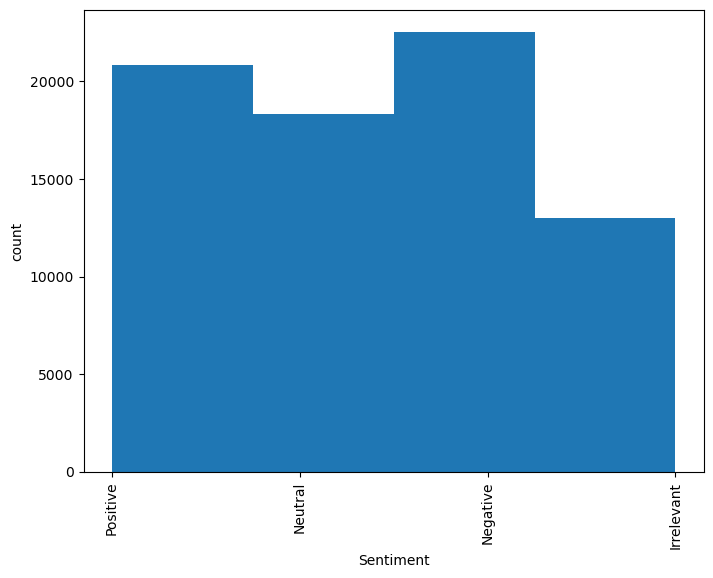

In [19]:

plt.figure(figsize=(8, 6)) 
plt.hist(data['Sentiment'],bins = 4)
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.xticks(rotation =90)
plt.show()

In [20]:
my_order = data['Game'].value_counts().sort_values(ascending =  False).index
print(my_order)

Index(['TomClancysRainbowSix', 'MaddenNFL', 'Microsoft', 'LeagueOfLegends',
       'CallOfDuty', 'Verizon', 'CallOfDutyBlackopsColdWar', 'ApexLegends',
       'Facebook', 'WorldOfCraft', 'Dota2', 'NBA2K', 'TomClancysGhostRecon',
       'Battlefield', 'FIFA', 'Overwatch', 'Xbox(Xseries)', 'johnson&johnson',
       'Amazon', 'PlayStation5(PS5)', 'HomeDepot', 'Cyberpunk2077', 'CS-GO',
       'GrandTheftAuto(GTA)', 'Hearthstone', 'Nvidia', 'Google', 'Borderlands',
       'PlayerUnknownsBattlegrounds(PUBG)', 'Fortnite',
       'RedDeadRedemption(RDR)', 'AssassinsCreed'],
      dtype='object', name='Game')


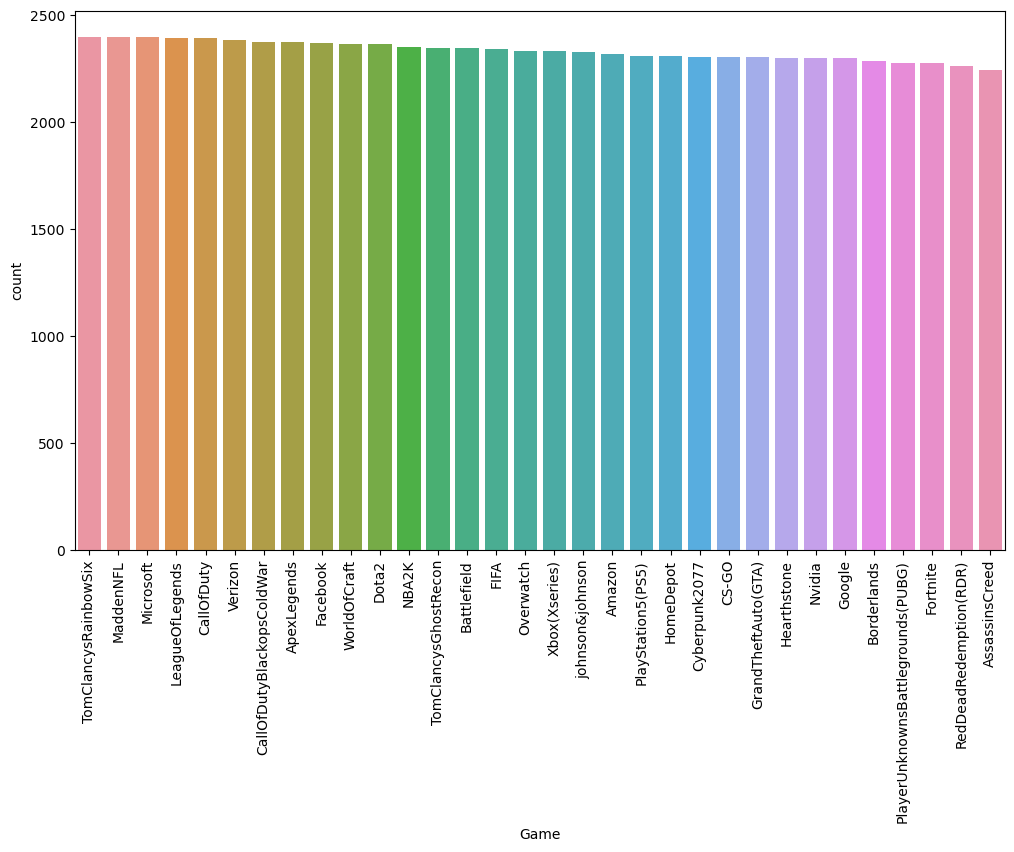

In [21]:
import seaborn as sns
#this is just to find which game has more entries
plt.figure(figsize = (12,7))
sns.countplot(x = 'Game', data = data ,order = my_order)
plt.xticks(rotation =90)
plt.show()

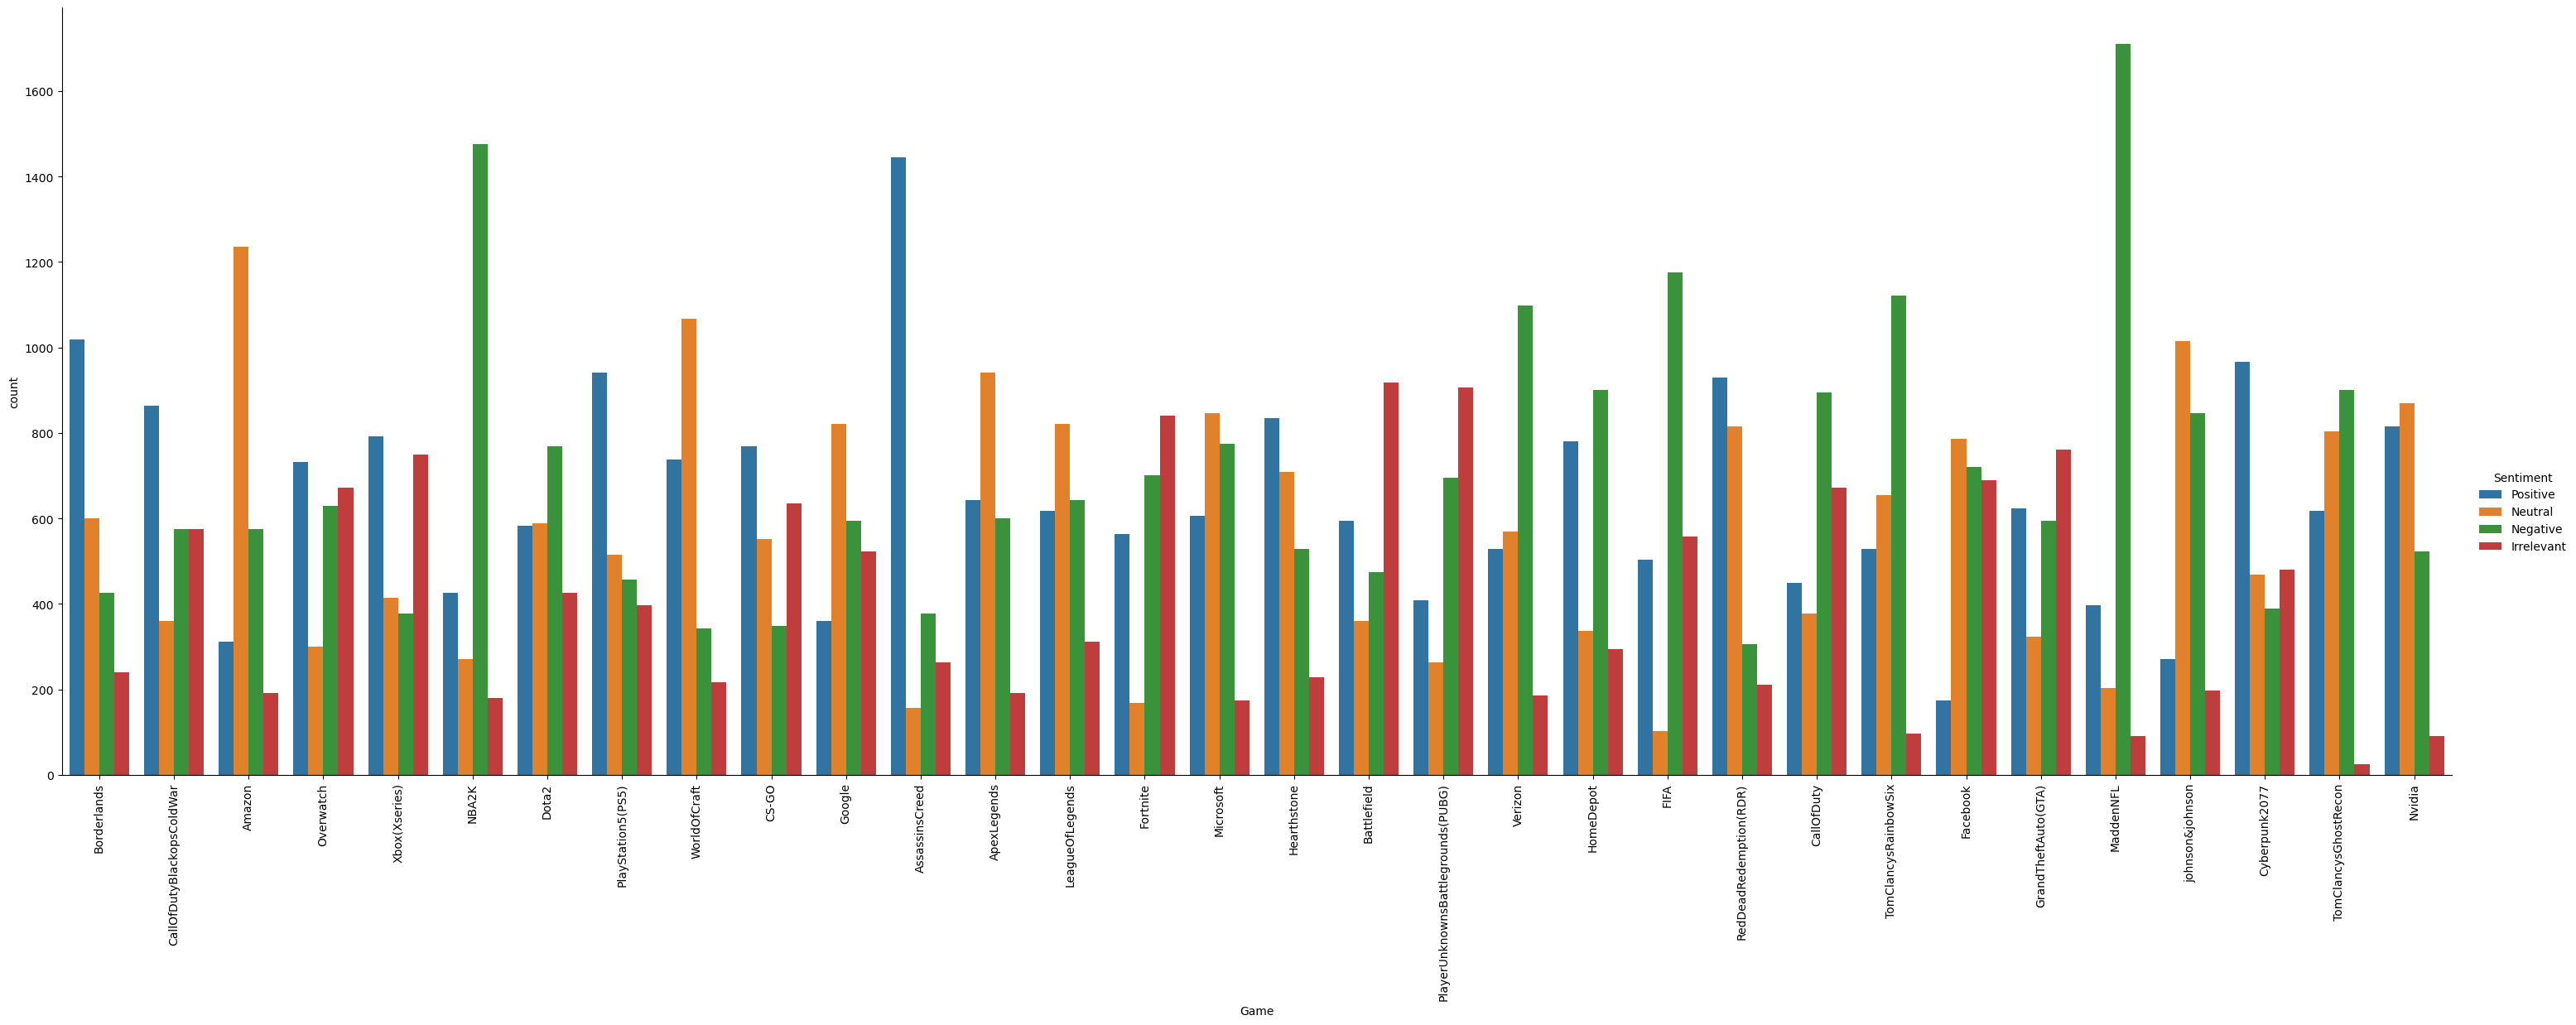

In [22]:
g= sns.catplot(x = 'Game' , hue = 'Sentiment' , kind = 'count' ,data =data, height =10 ,aspect =3)
g.set_xticklabels(rotation =90)
plt.show()

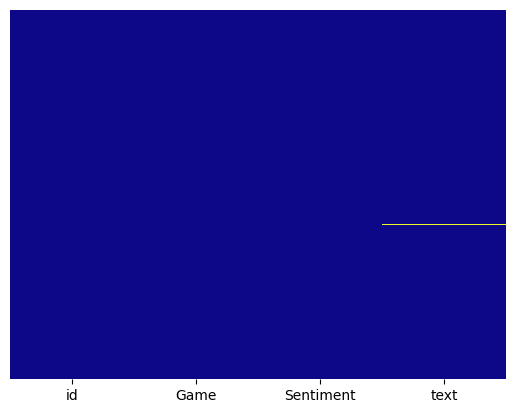

In [23]:
null_value = data.isna()
sns.heatmap(null_value,cbar= False,cmap ='plasma' ,yticklabels =False)
plt.show()


In [30]:

total_null = data.isna().sum().sort_values(ascending = True)
missing_percentage = ((data.isna().sum()/data.isna().count())*100).sort_values(ascending = True)
missing_data = pd.concat([total_null,missing_percentage.round(2)],axis =1 ,keys=['Total missing','In Percent'])
display(missing_data)

,Total missing,In Percent
id,0,0.0
Game,0,0.0
Sentiment,0,0.0
text,0,0.0


In [31]:
data.count()

id           73995
Game         73995
Sentiment    73995
text         73995
dtype: int64

In [32]:
data.dropna(subset=['text'],inplace = True)
total_null = data.isna().sum().sort_values(ascending = True)
missing_percentage = ((data.isna().sum()/data.isna().count())*100).sort_values(ascending = True)
missing_data = pd.concat([total_null,missing_percentage.round(2)],axis =1 ,keys=['Total missing','In Percent'])
display(missing_data)

,Total missing,In Percent
id,0,0.0
Game,0,0.0
Sentiment,0,0.0
text,0,0.0


In [33]:
data.count()

id           73995
Game         73995
Sentiment    73995
text         73995
dtype: int64

In [43]:
id_types = data['id'].value_counts()


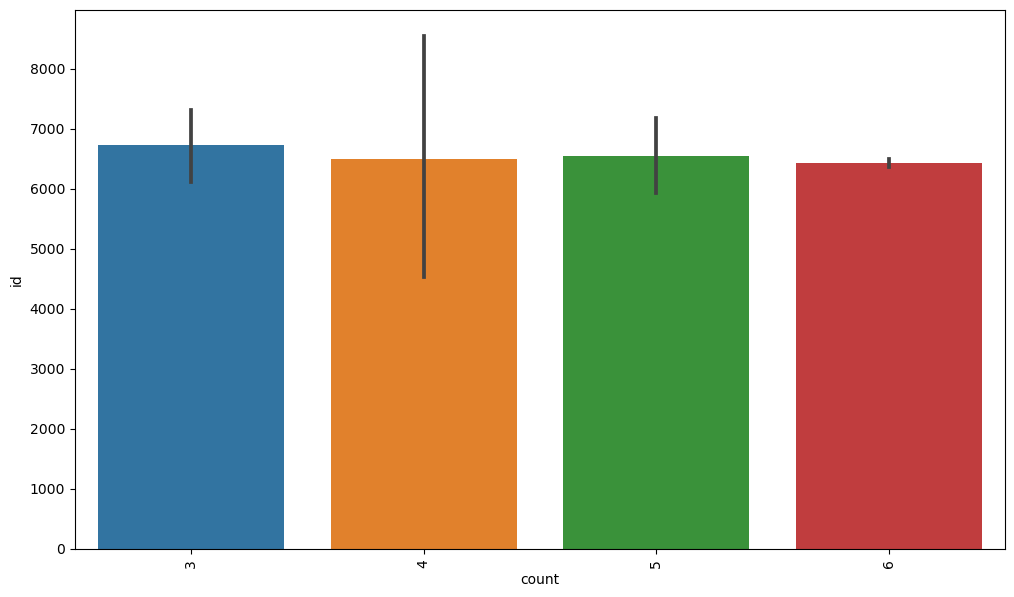

In [44]:
plt.figure(figsize = (12,7))
sns.barplot(x = id_types,y = id_types.index)
plt.xticks(rotation =90)
plt.show()

In [53]:
game_types = data['Game'].value_counts().sort_values(ascending =True).head(10)
game_types

Game
AssassinsCreed                       2234
PlayerUnknownsBattlegrounds(PUBG)    2234
Fortnite                             2249
RedDeadRedemption(RDR)               2249
Cyberpunk2077                        2262
Nvidia                               2271
Google                               2274
Amazon                               2276
Borderlands                          2279
Xbox(Xseries)                        2283
Name: count, dtype: int64

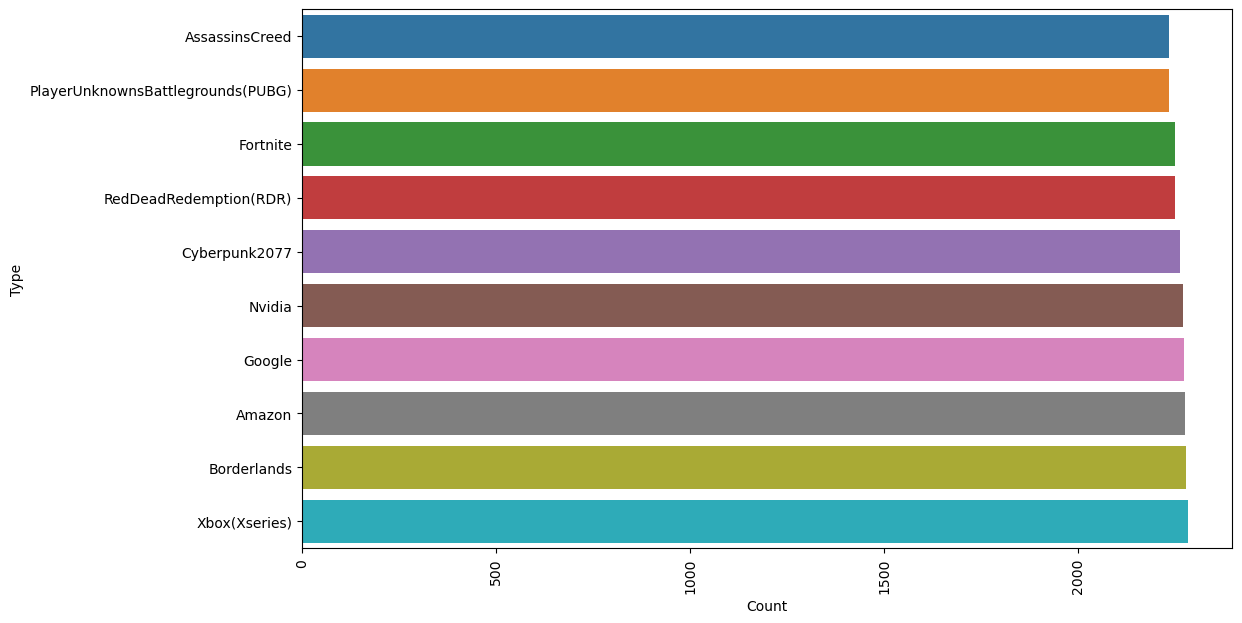

In [56]:
plt.figure(figsize = (12,7))
sns.barplot(x = game_types.values,y = game_types.index)
plt.xticks(rotation =90)
plt.ylabel('Type')
plt.xlabel('Count')
plt.show()

In [59]:
senti_types = data['Sentiment'].value_counts().sort_values(ascending =True)
senti_types

Sentiment
Irrelevant    12875
Neutral       18108
Positive      20654
Negative      22358
Name: count, dtype: int64

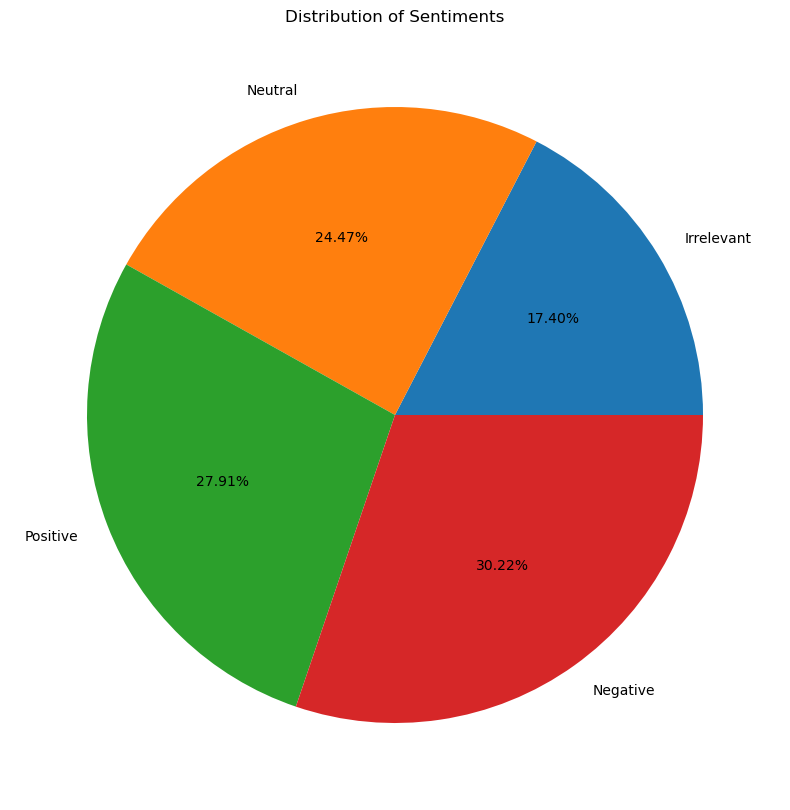

In [63]:
plt.figure(figsize = (10,10))
plt.pie(x = senti_types.values,labels = senti_types.index,autopct = '%.2f%%')
plt.title('Distribution of Sentiments')
plt.show()